# Multivariate normal distribution

In [1]:
# Imports
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

## Univariate normal distribution

The normal distribution, also known as the Gaussian distribution, is defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$. The square $\sigma^2$ of the standard deviation is called variance. We denote this distribution as: 

$$
\mathcal{N}(\mu, \sigma^2)
$$

Given $\mu$ and $\sigma$, the probability density function is given by 

$$
p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}
$$

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the next figure:

In [3]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

<IPython.core.display.Javascript object>


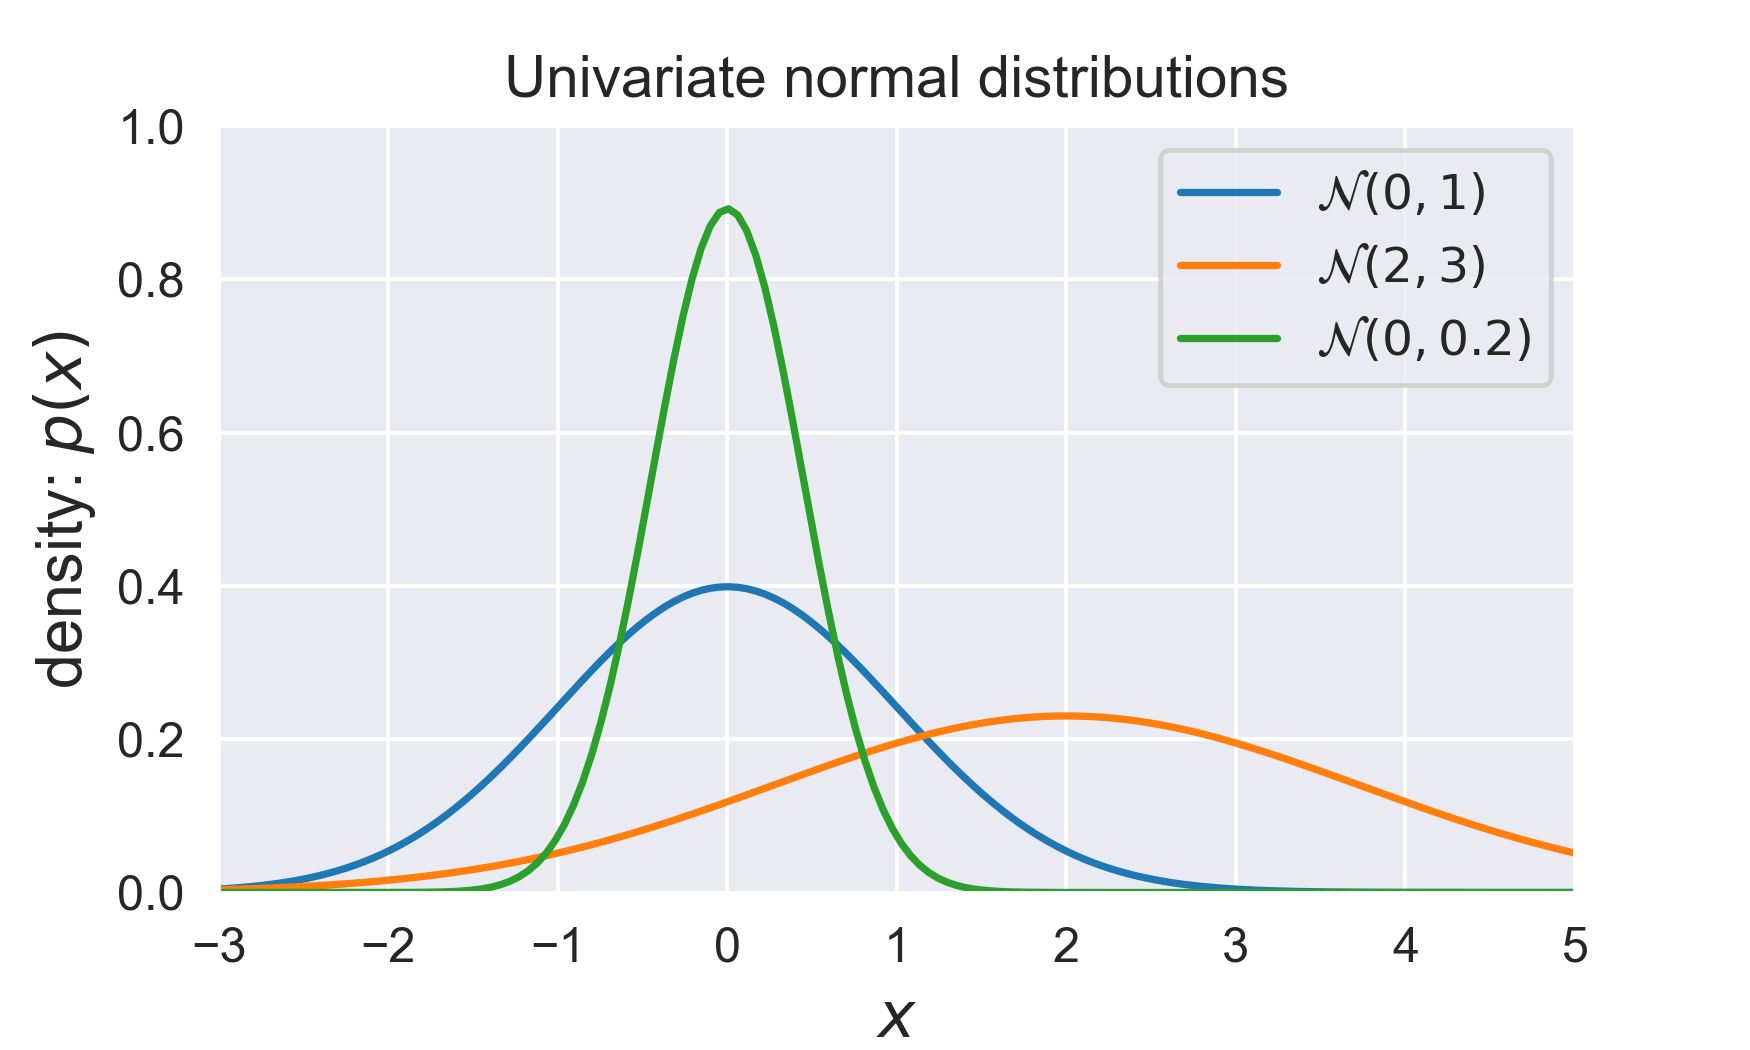

In [5]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=150)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#

## Multivariate normal distribution

The multivariate normal distribution is a multidimensional generalization of the univariae case. It represents the distribution of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mathbf{\mu}$ and the covariance matrix $\Sigma$ which measures the mutual dependencies of the random variables. 

The multivariate normal has a joint density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where $\mathbf{x}$ a $d$-dimensional random vector, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the covariance matrix of size $d \times d$, and $\lvert\Sigma\rvert$ its determinant. We denote this multivariate normal distribution as: 

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

In [2]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$ so that these 2 variables are independent:

$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:


$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

<IPython.core.display.Javascript object>


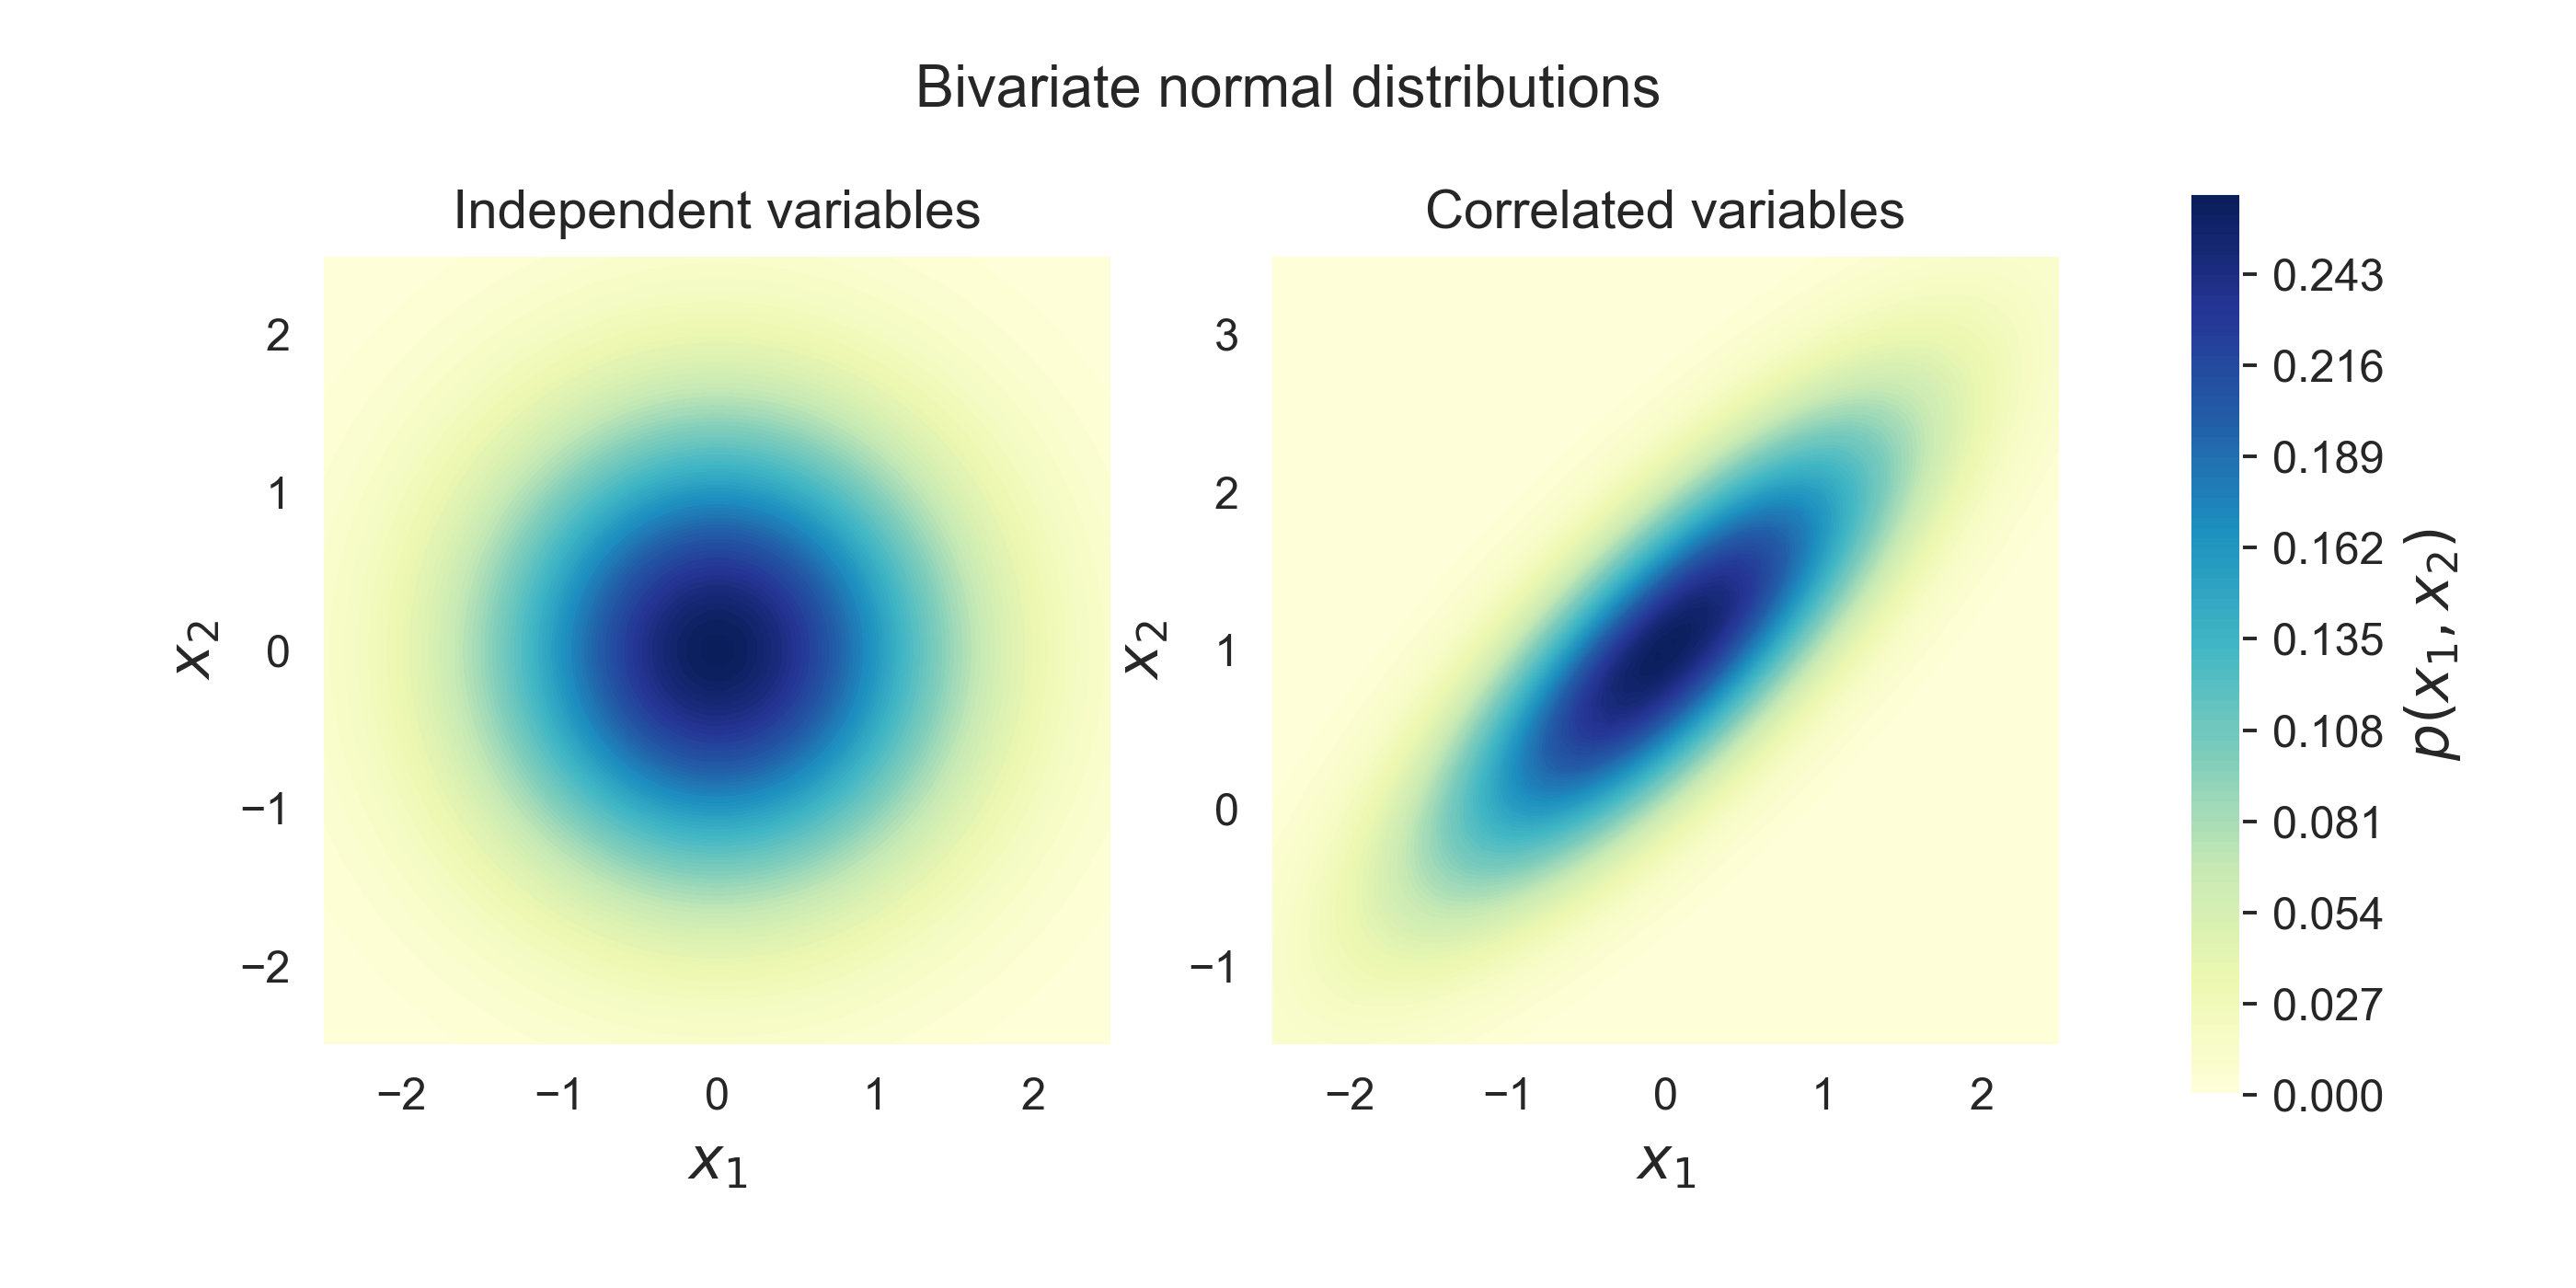

In [8]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()
#

## Linear Regression Revisited

<IPython.core.display.Javascript object>


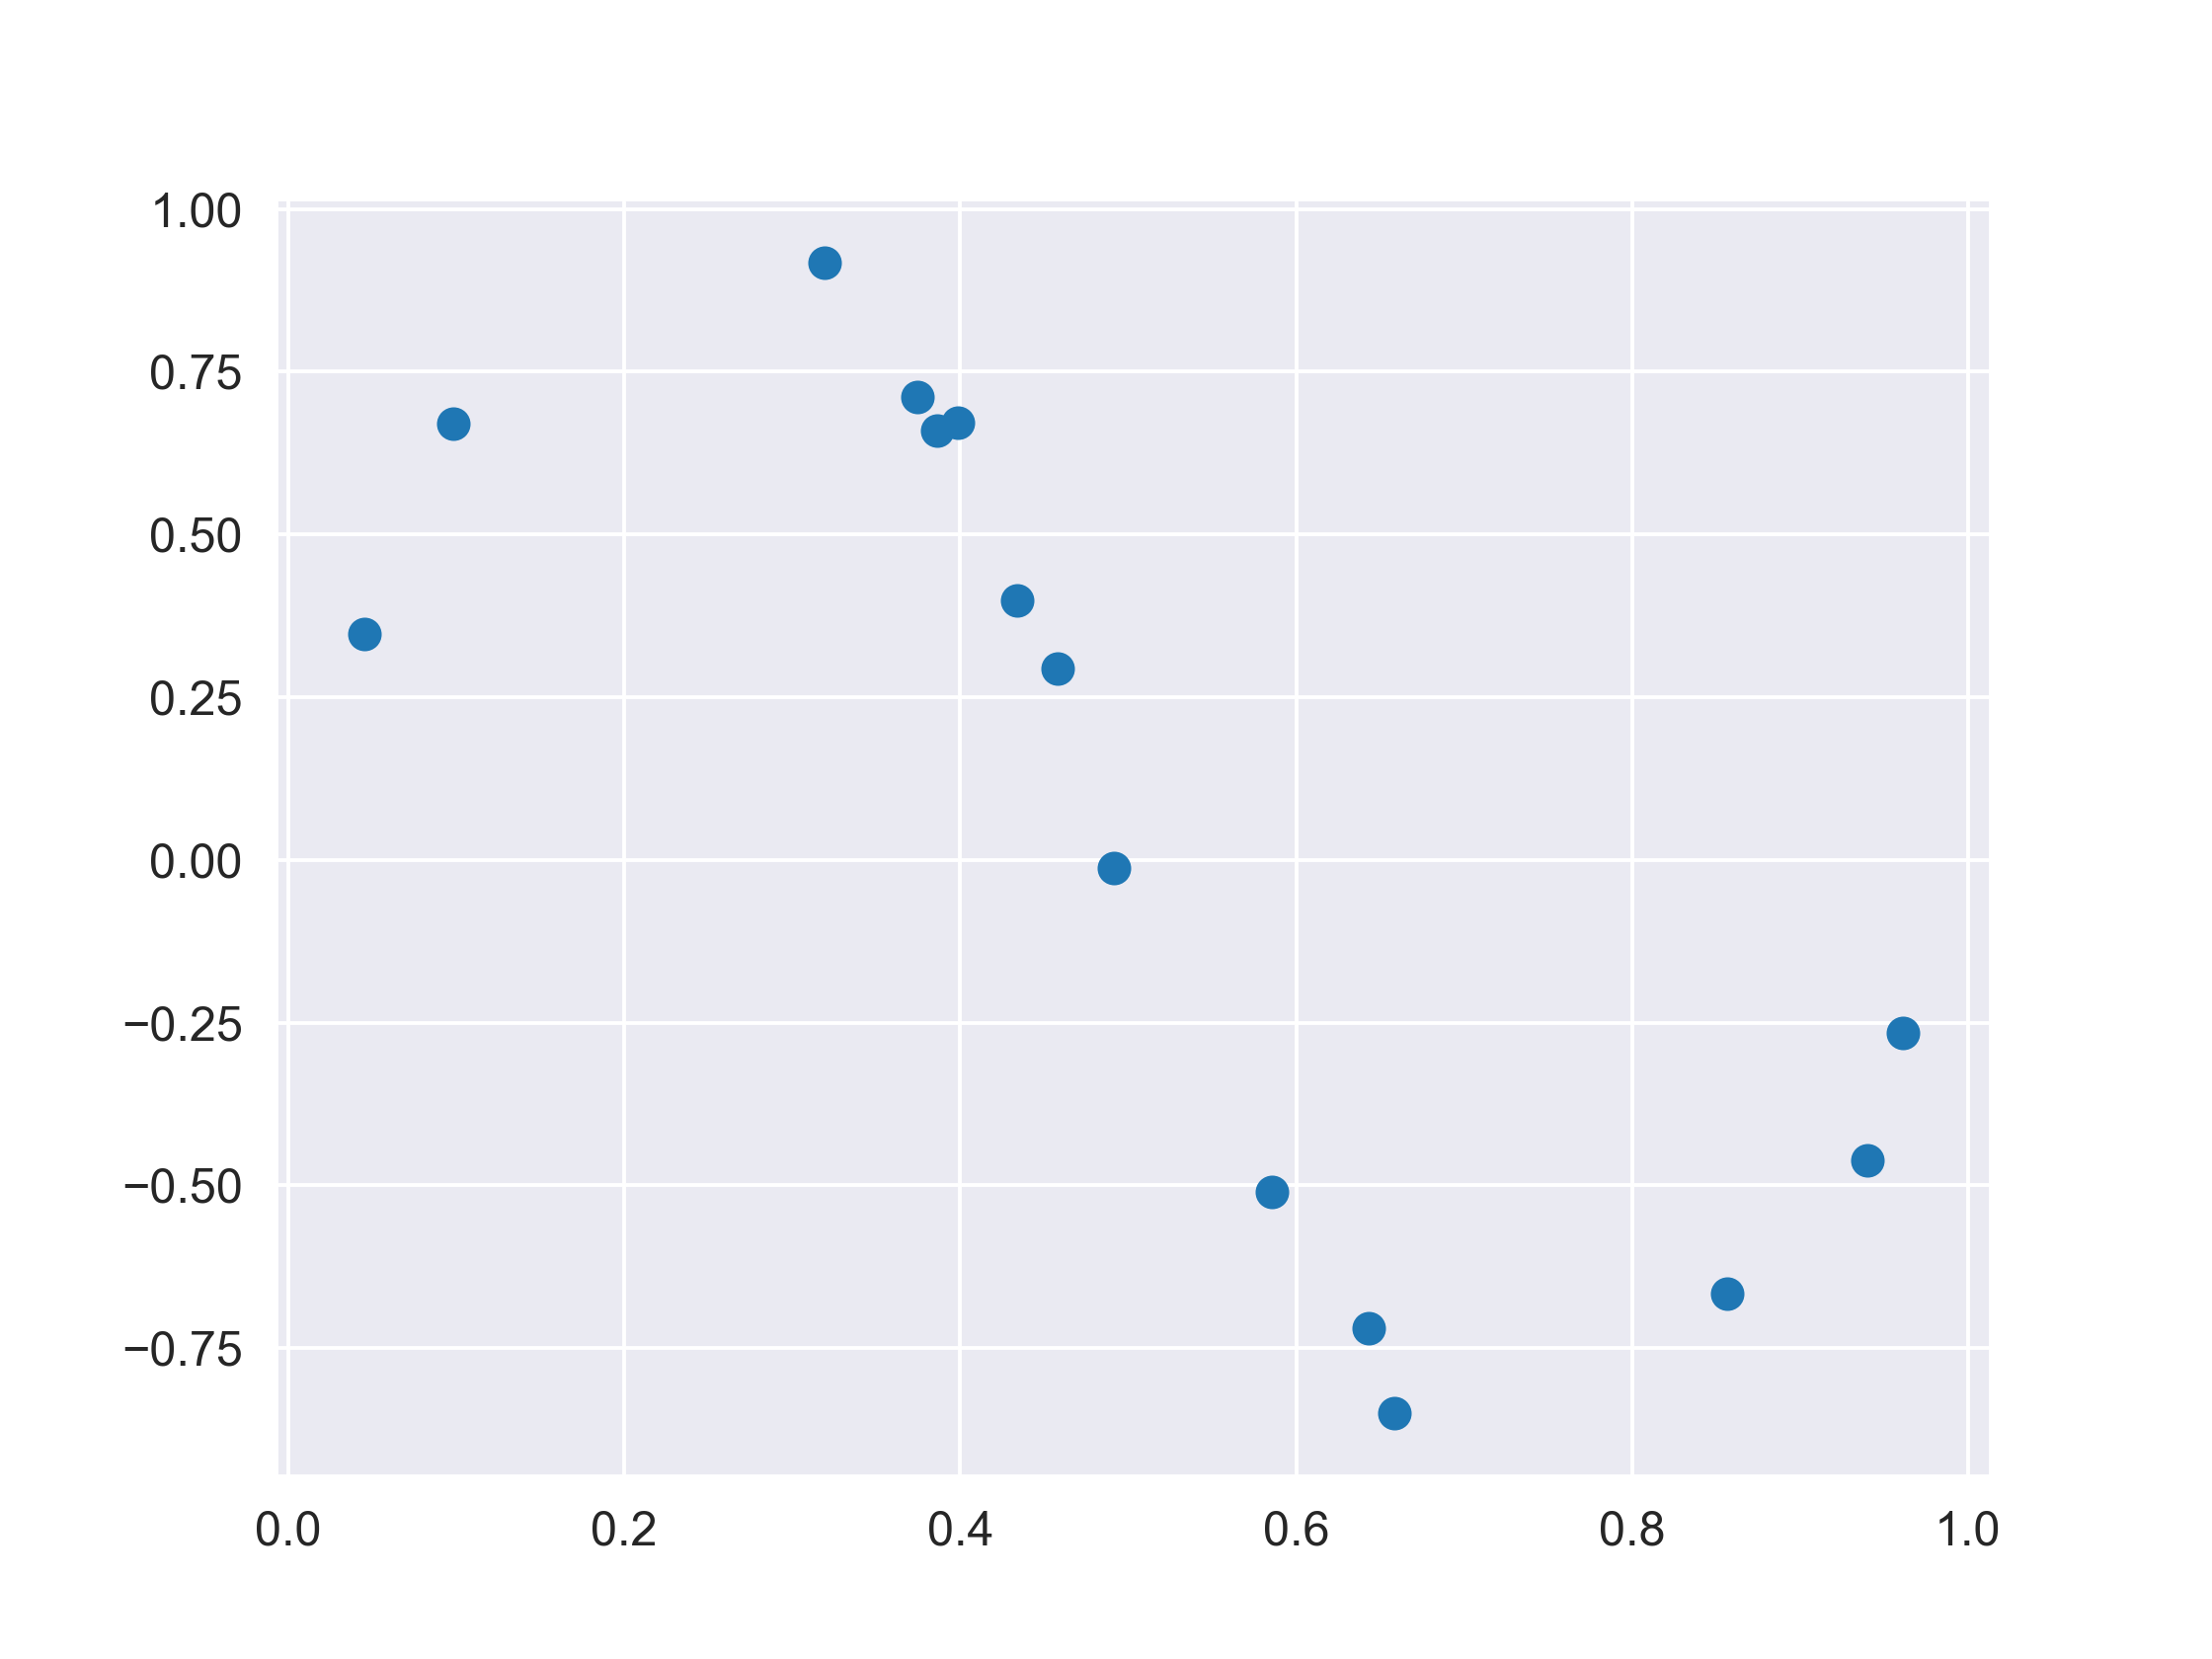

In [24]:
### Generating the data ##########
n_points=15
P=[]
for i in range (0,n_points):
	x=np.random.random()
	y=np.sin(2*np.pi*x)
	z=y+np.random.normal(0,0.05)
#	print (x,z)
	P.append([x,z])

plt.figure()
plt.scatter(*zip(*P))    
plt.show()


In [5]:
P

[[0.45606998421703593, 0.20958138658243655],
 [0.5142344384136116, -0.02954637874443599],
 [0.5924145688620425, -0.5363521780014958],
 [0.17052412368729153, 0.8263448541638341],
 [0.06505159298527952, 0.33741999169677145],
 [0.09767211400638387, 0.6706336646478746],
 [0.6842330265121569, -1.017985325819364],
 [0.4951769101112702, 0.014124190737620747],
 [0.034388521115218396, 0.19144708871067084],
 [0.662522284353982, -0.8137784232084905]]

In [ ]:

### Result ##########

P=[[0.8846440661991892, -0.864791215635069],
 [0.793349886821054, -1.32738612014193],
 [0.7354408415584879, -1.18222466237236],
 [0.42187176484679356, 0.304255805886633],
 [0.011883272993057137, 0.101594120287724],
 [0.22677018897293355, 1.13377458999431],
 [0.9785306716286032, -0.147028527196347],
 [0.043107697015664526, 0.247622971933151],
 [0.8900032869307322, -0.605625802202937],
 [0.8883627996249959, -0.649537521948140]]


In [25]:
X1=np.empty((2,n_points))
for i in range (0,2):
	for j in range(0,n_points):
		X1[i,j]=(P[j][0])**i


X3=np.empty((4,n_points))
for i in range (0,4):
	for j in range(0,n_points):
		X3[i,j]=(P[j][0])**i

X6=np.empty((7,n_points))
for i in range (0,7):
	for j in range(0,n_points):
		X6[i,j]=(P[j][0])**i

X9=np.empty((10,n_points))
for i in range (0,10):
	for j in range(0,n_points):
		X9[i,j]=(P[j][0])**i

T=np.empty((n_points,1))
for i in range (0,n_points):
	T[i,0]=P[i][1]


In [26]:

Y1=X1@X1.transpose()
Y3=X3@X3.transpose()
Y6=X6@X6.transpose()
Y9=X9@X9.transpose()

W1=np.linalg.inv(Y1)@X1@T
W3=np.linalg.inv(Y3)@X3@T
W6=np.linalg.inv(Y6)@X6@T
W9=np.linalg.inv(Y9)@X9@T



In [27]:

def F1(x):
    return W1[0][0]+W1[1][0]*x

def F3(x):
    return W3[0][0]+W3[1][0]*x+W3[2][0]*x**2+W3[3][0]*x**3

def F6(x):
    return W6[0][0]+W6[1][0]*x+W6[2][0]*x**2+W6[3][0]*x**3+W6[4][0]*x**4+W6[5][0]*x**5+W6[6][0]*x**6

def F9(x):
    return W9[0][0]+W9[1][0]*x+W9[2][0]*x**2+W9[3][0]*x**3+W9[4][0]*x**4+W9[5][0]*x**5+W9[6][0]*x**6+W9[7][0]*x**7+W9[8][0]*x**8+W9[9][0]*x**9


<IPython.core.display.Javascript object>


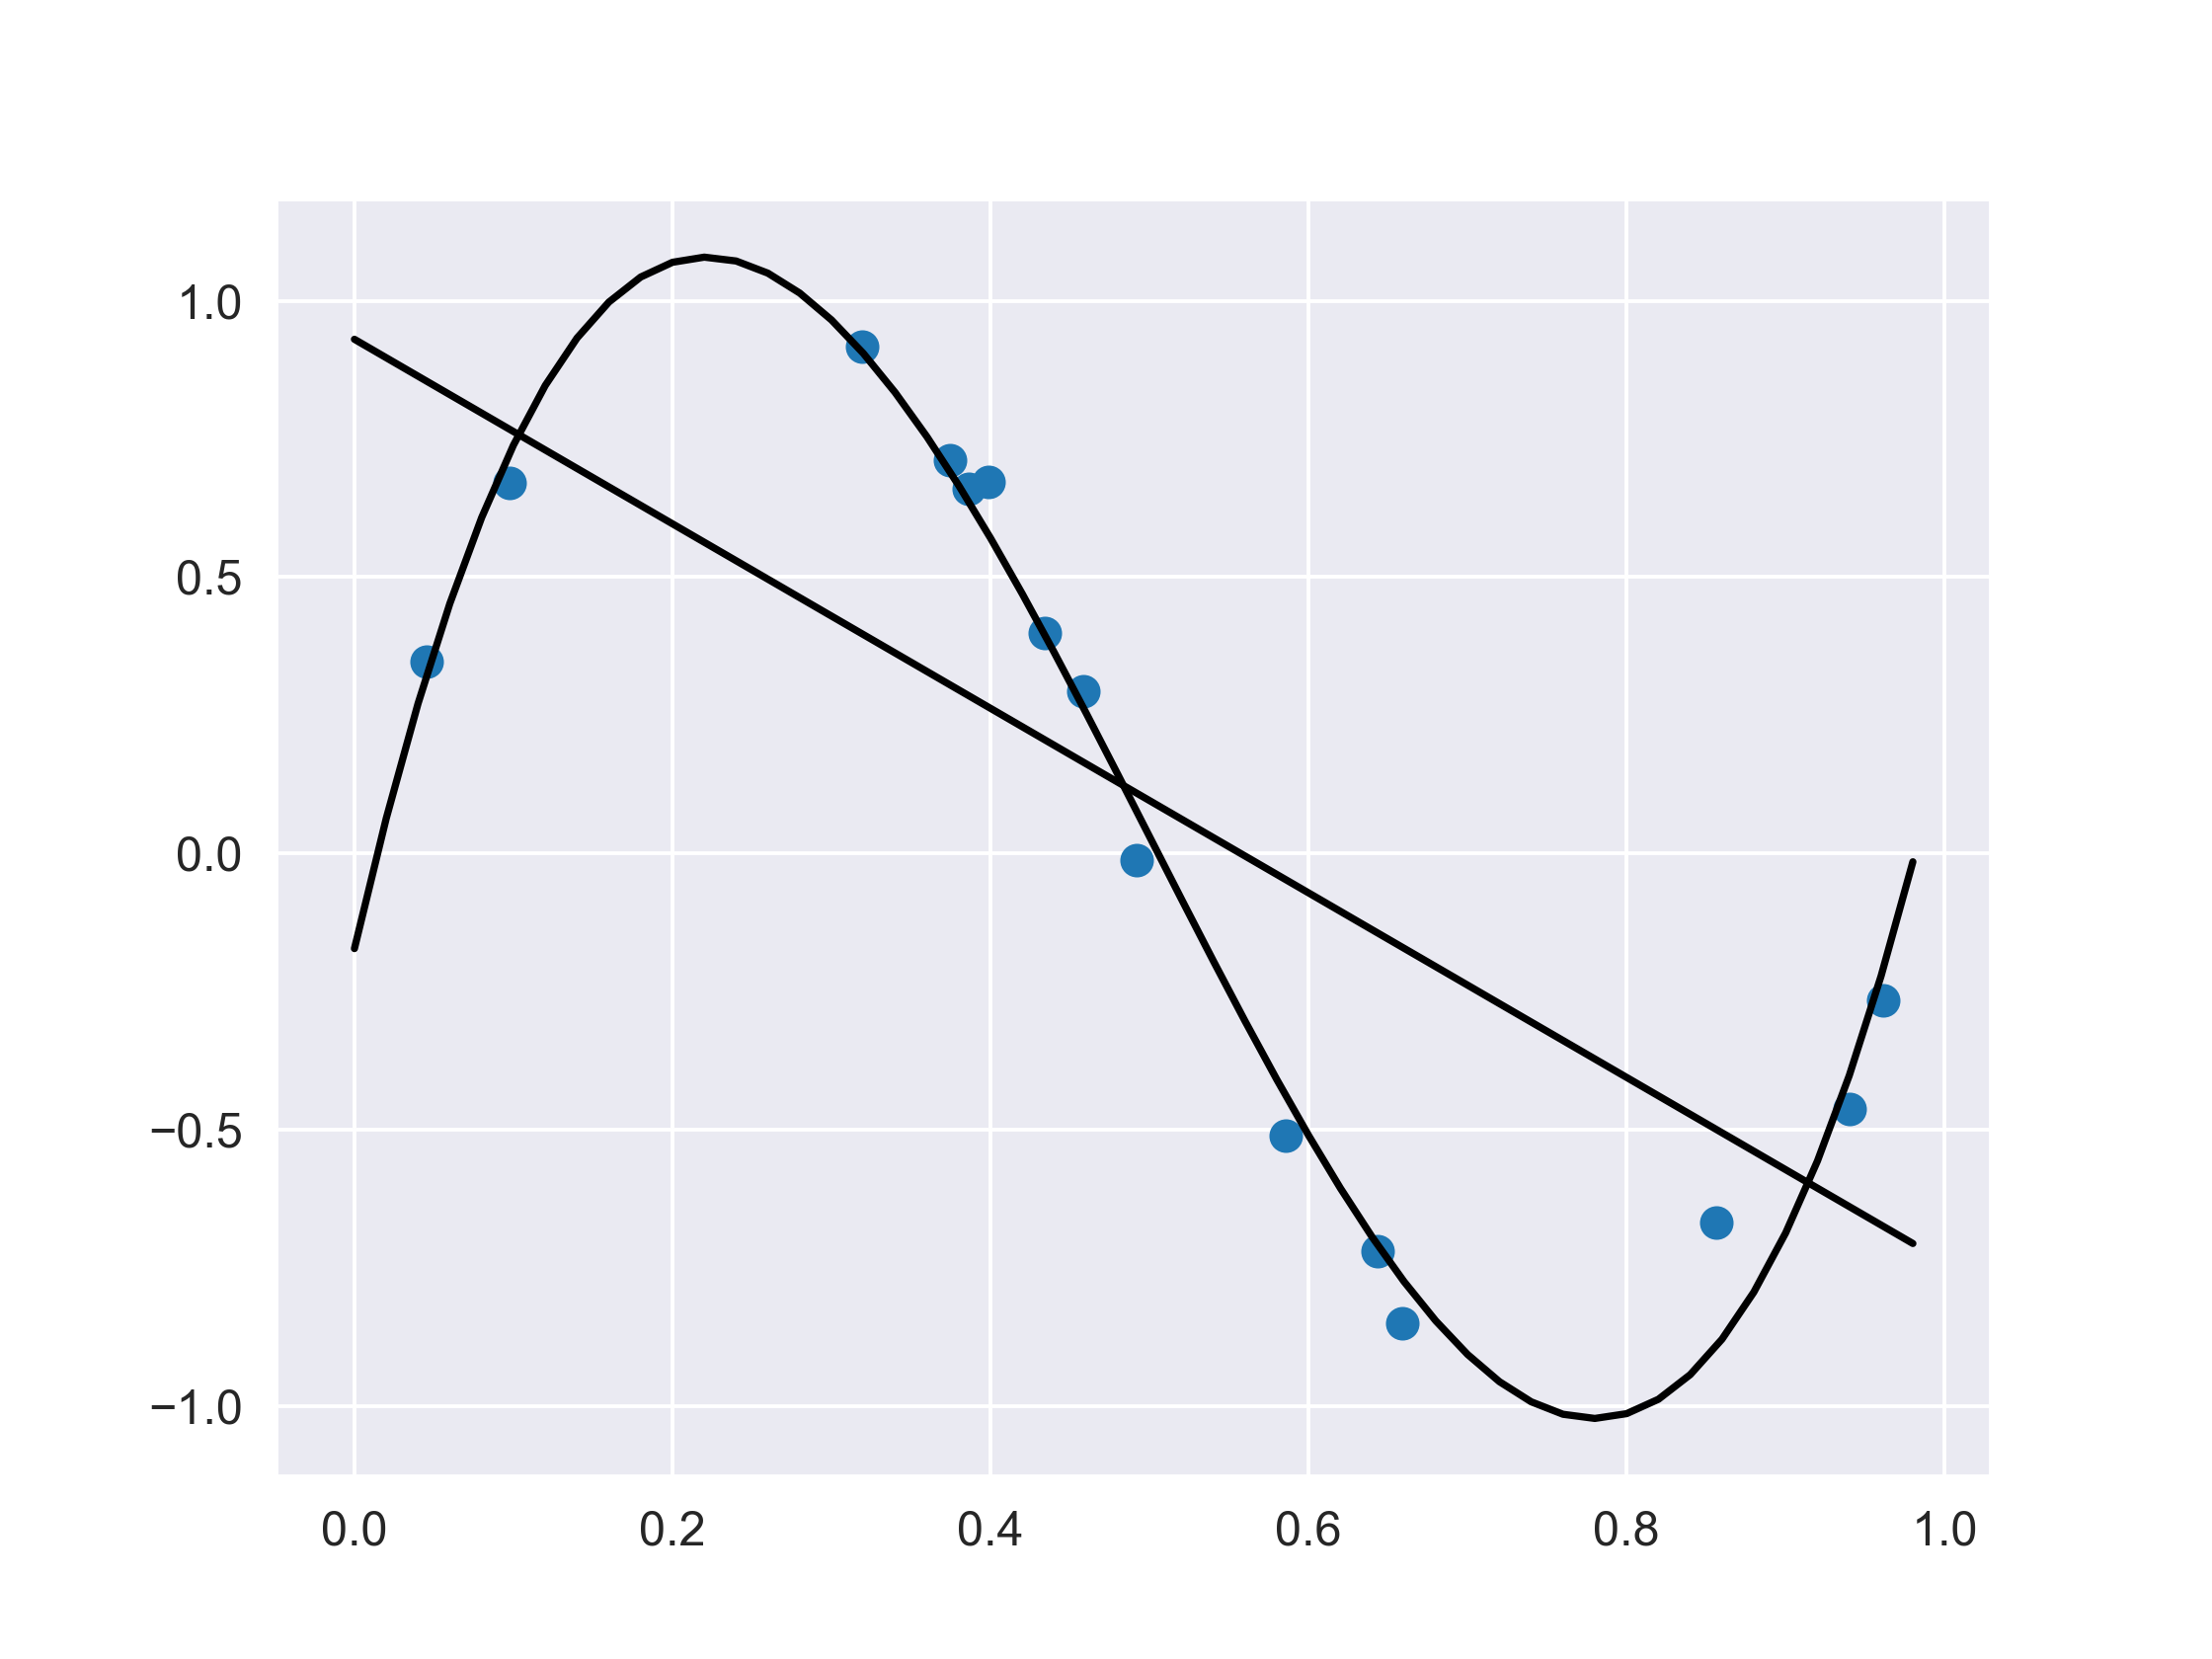

<IPython.core.display.Javascript object>


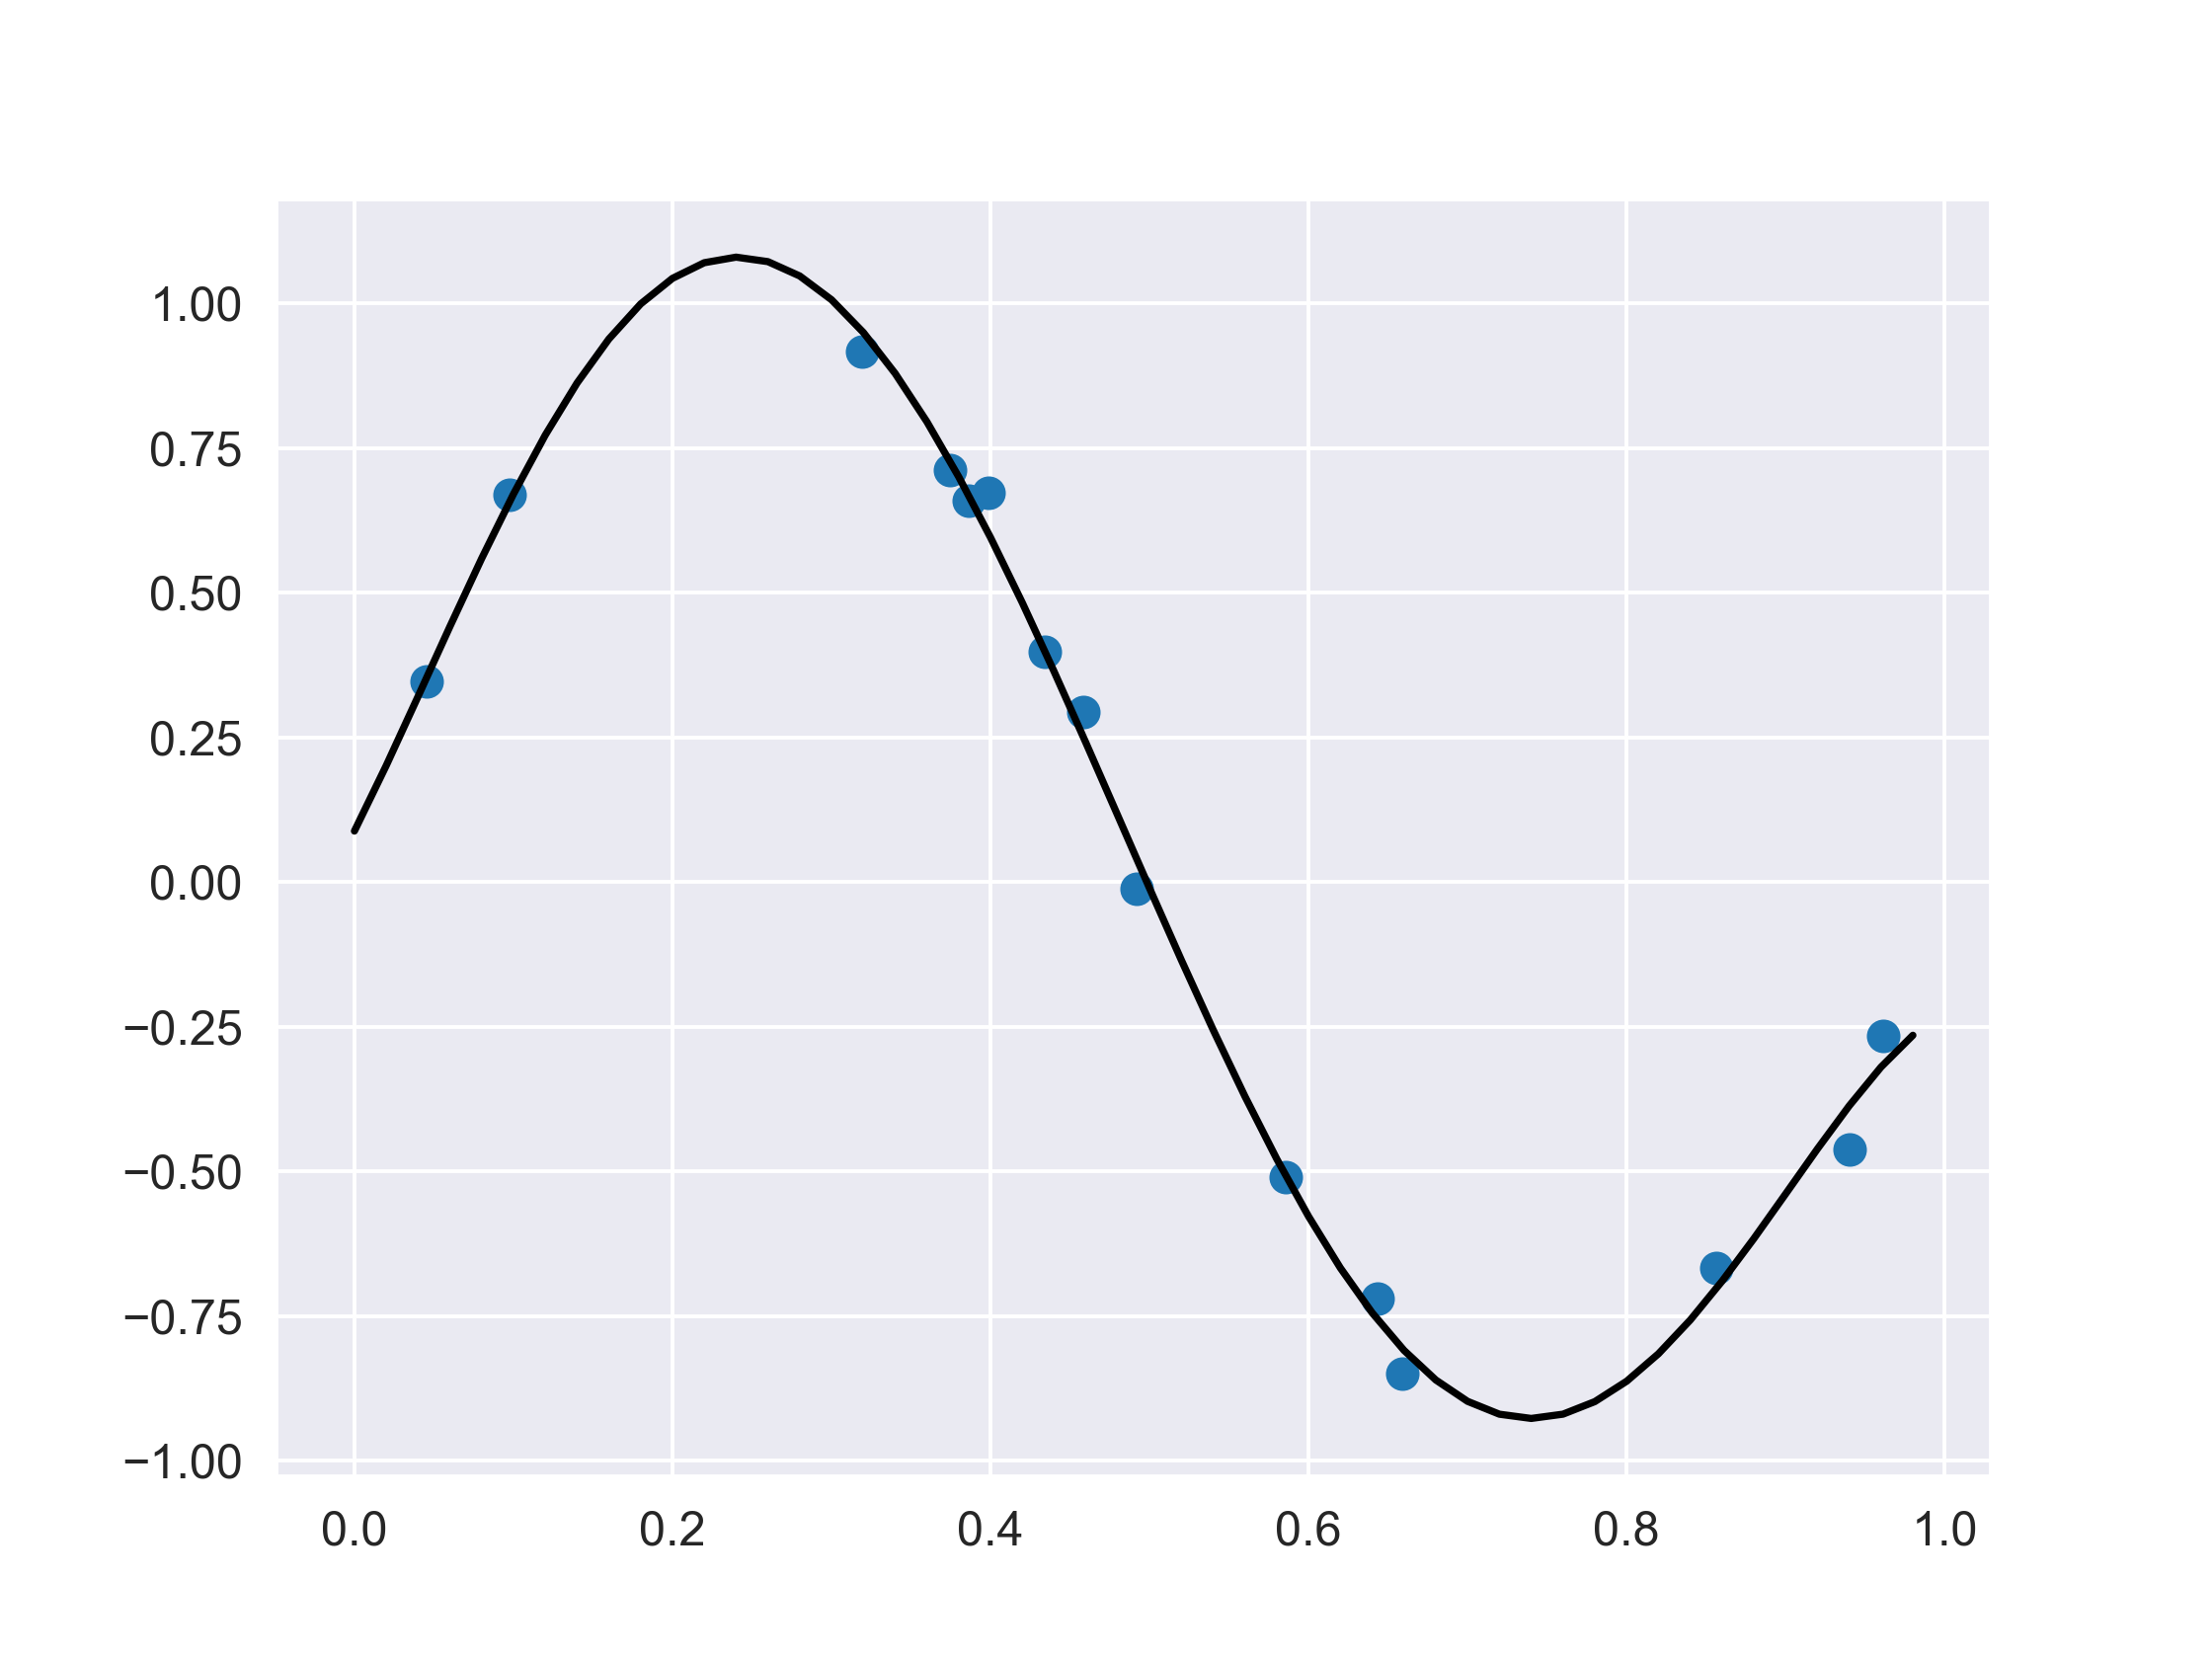

<IPython.core.display.Javascript object>


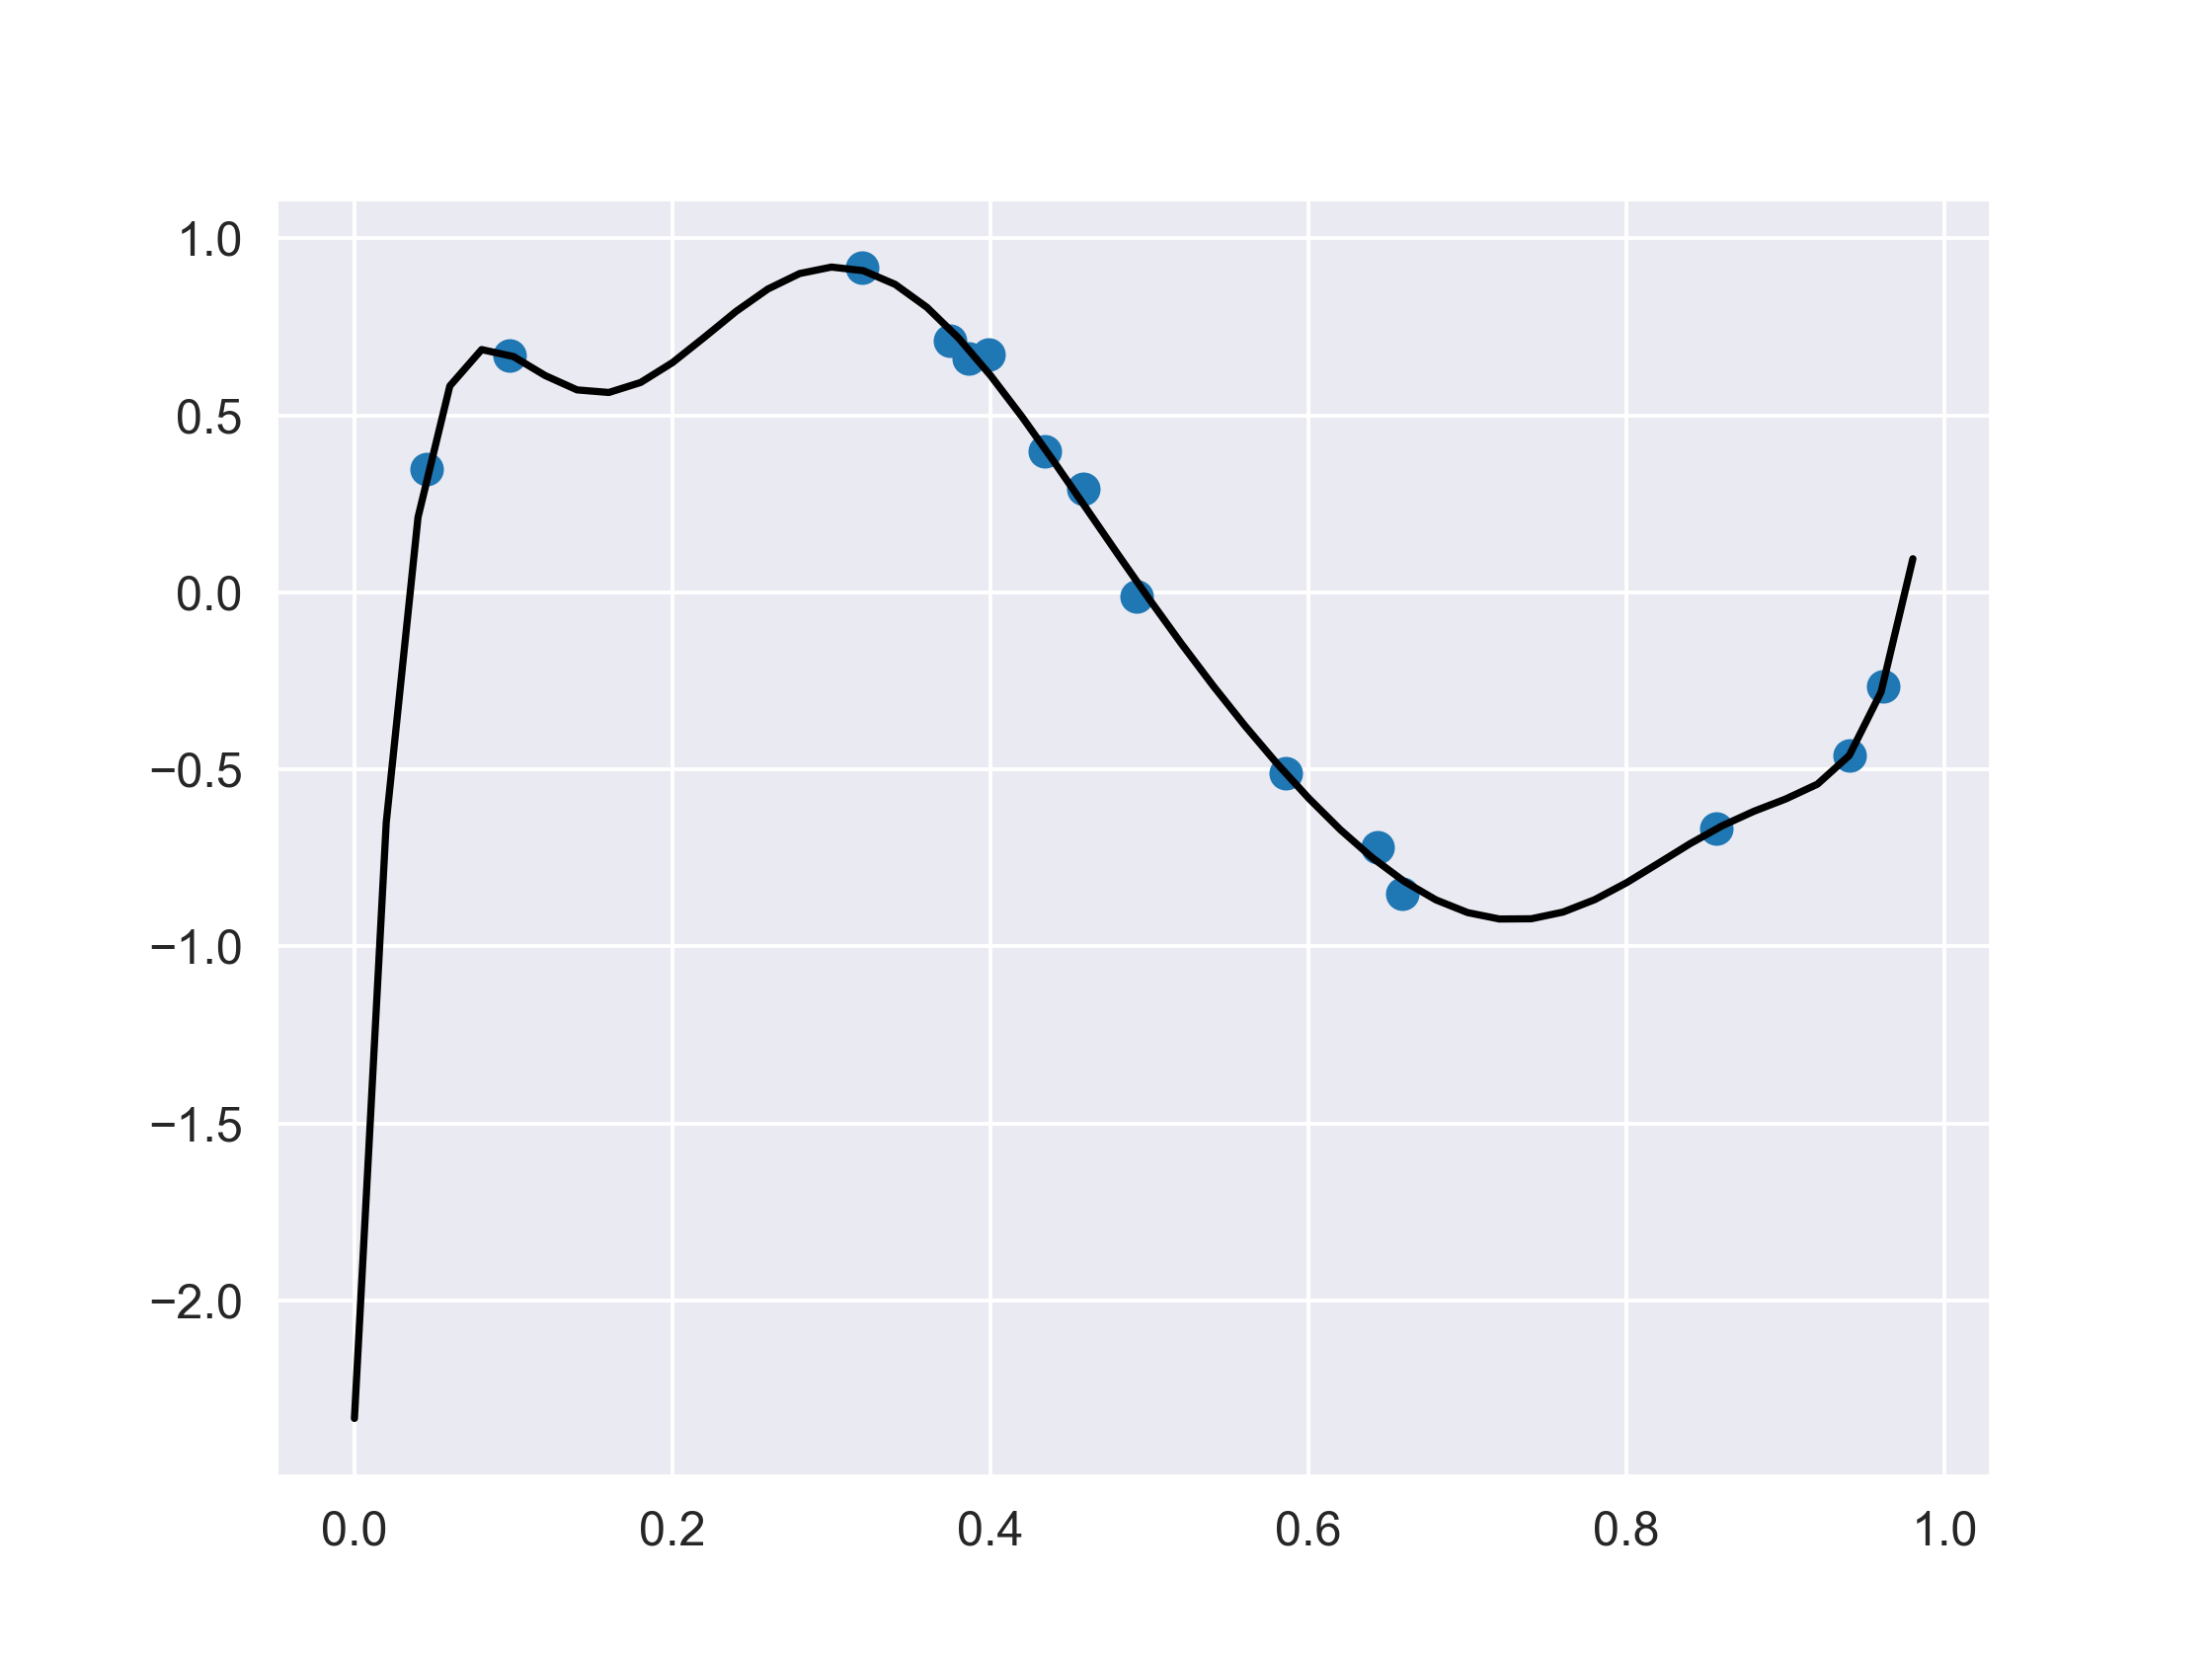

In [28]:
xe=np.arange(0,1,0.02)

plt.figure()
plt.plot(xe, F1(xe),'k')
plt.plot(xe, F3(xe),'k')
plt.scatter(*zip(*P))


plt.figure()
plt.plot(xe, F6(xe),'k')
plt.scatter(*zip(*P))

plt.figure()
plt.plot(xe, F9(xe),'k')
plt.scatter(*zip(*P))



In [38]:
print(F6(0.123)) 
print(F9(0.123))

0.5486579835460237
24.875366088108674


<IPython.core.display.Javascript object>


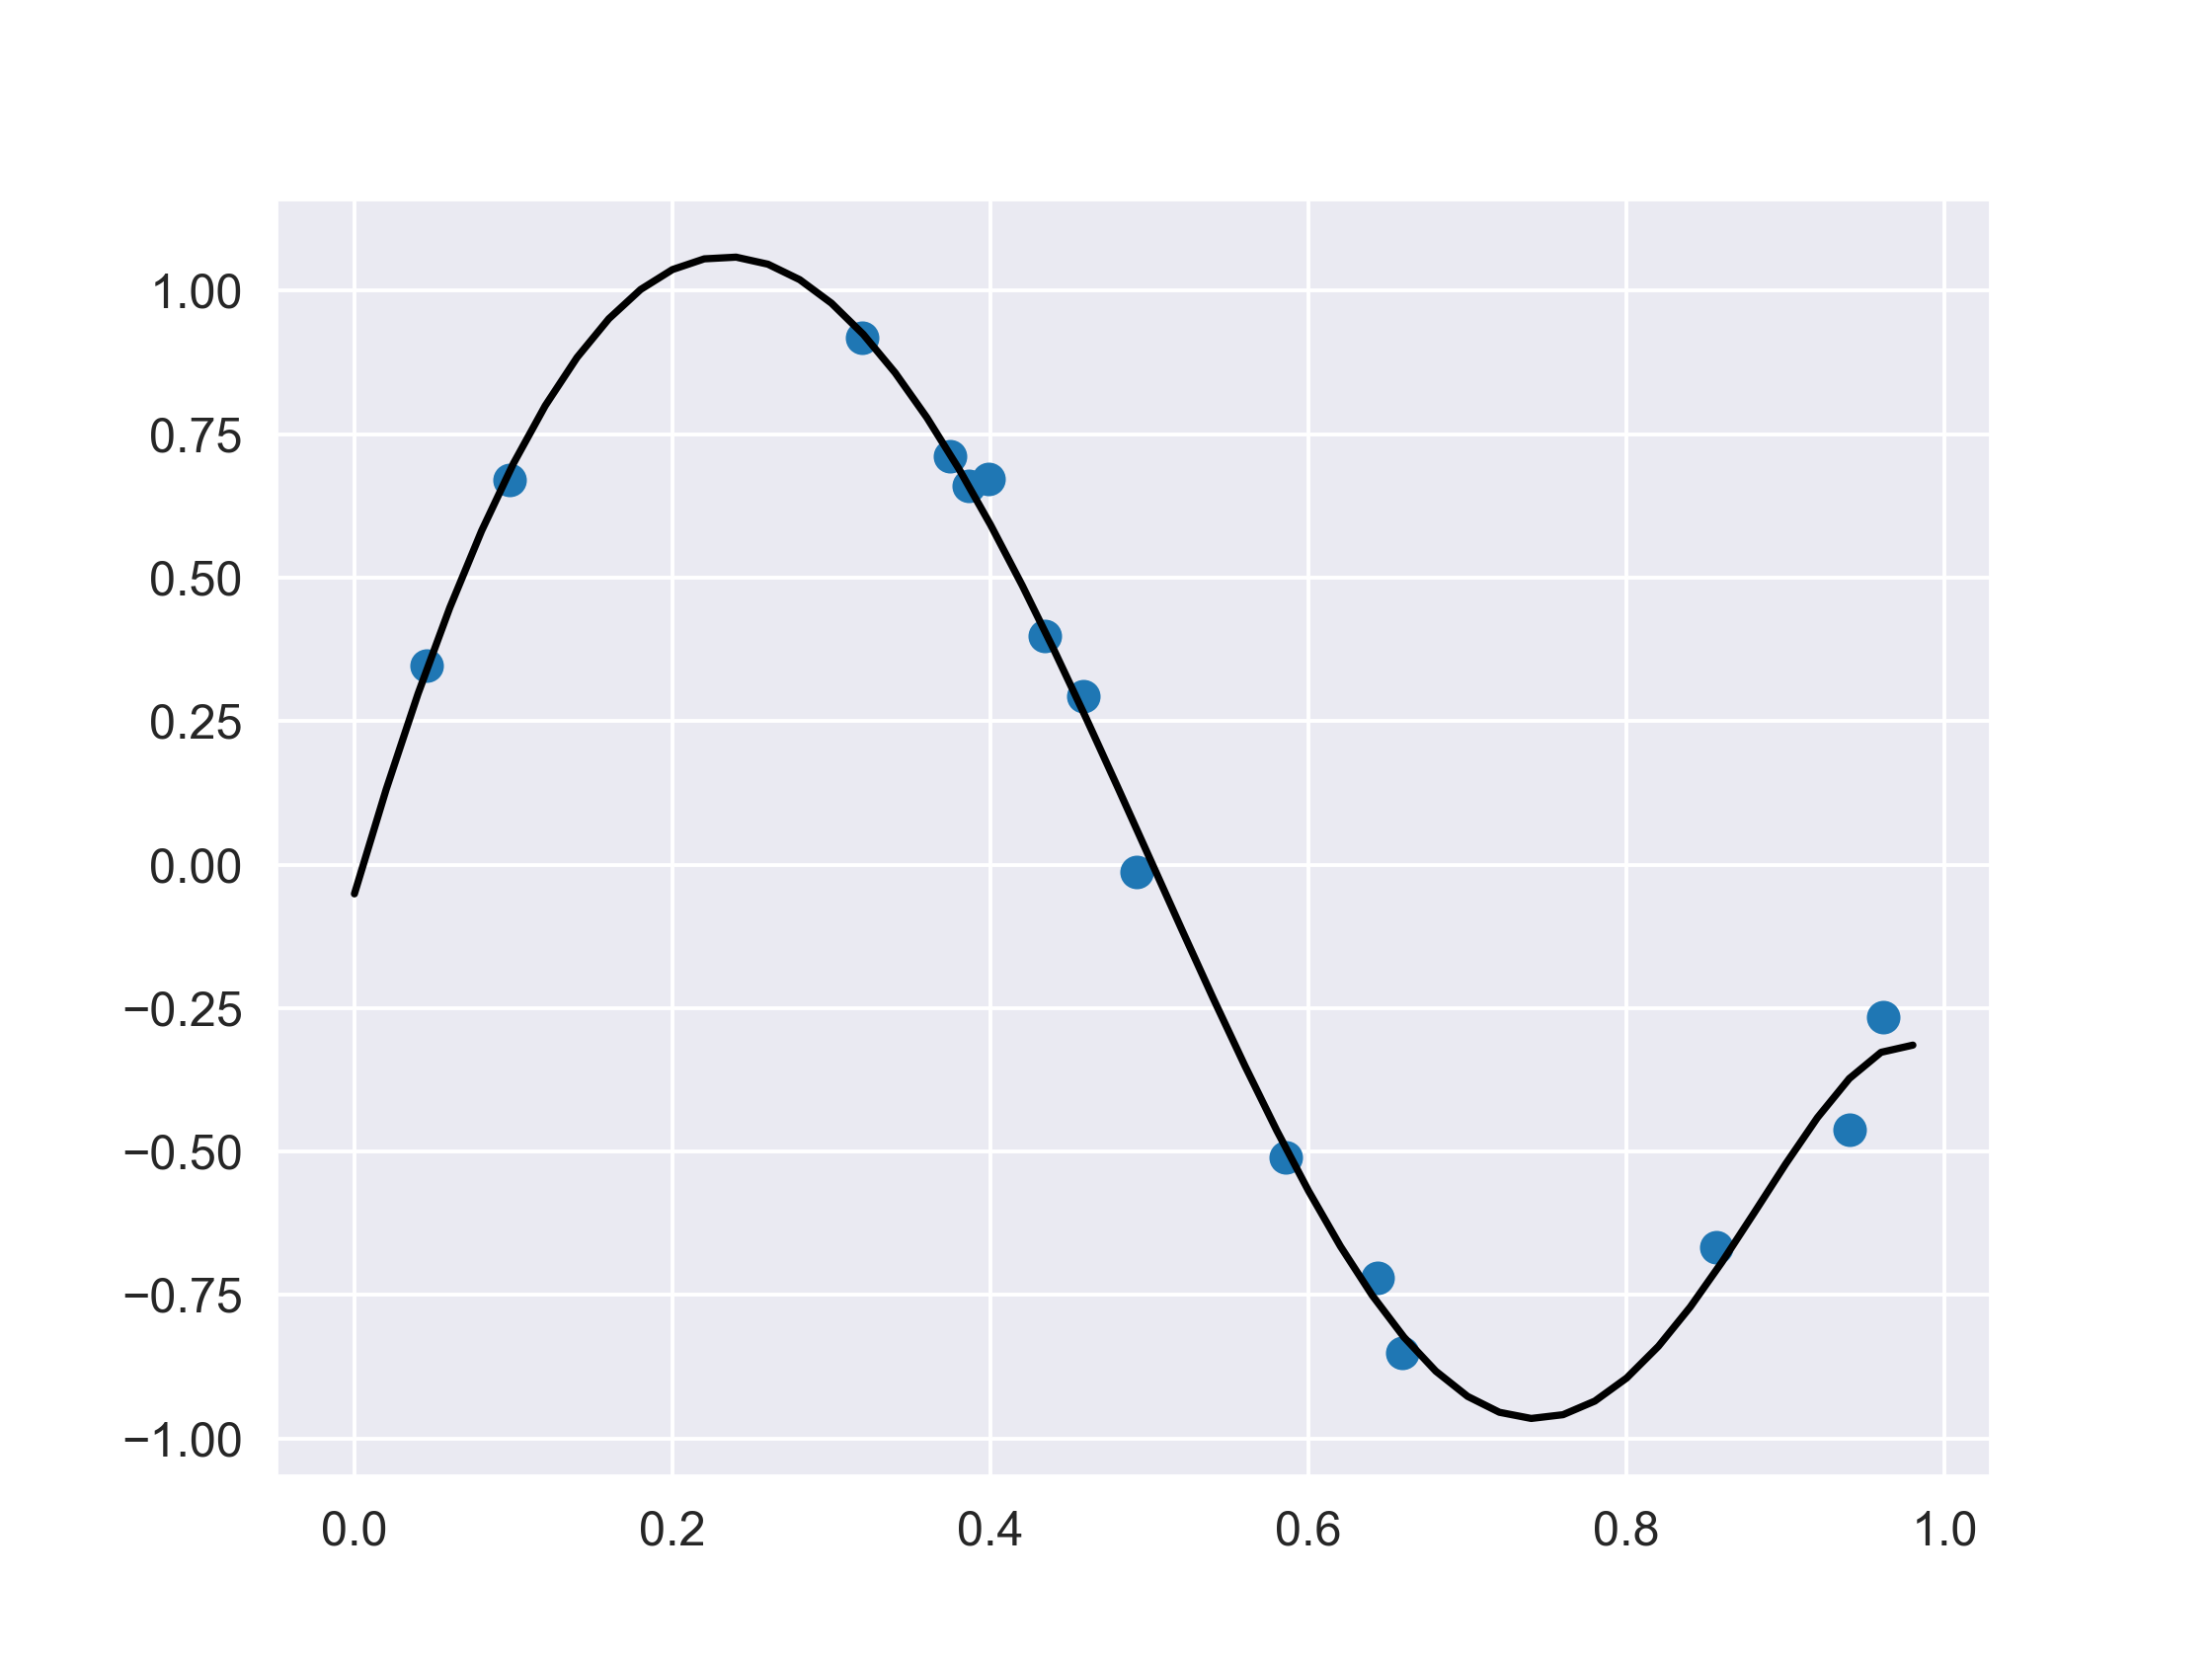

In [29]:
alpha=0.01
beta=1000

X9=np.empty((10,n_points))
for i in range (0,10):
	for j in range(0,n_points):
		X9[i,j]=(P[j][0])**i

T=np.empty((n_points,1))
for i in range (0,n_points):
	T[i,0]=P[i][1]

Y9=X9@X9.transpose()

S_inv=beta*Y9+alpha*np.identity(10)

S=np.linalg.inv(S_inv)

W9=beta*S@X9@T


def FB9(x):
    return W9[0][0]+W9[1][0]*x+W9[2][0]*x**2+W9[3][0]*x**3 \
           +W9[4][0]*x**4+W9[5][0]*x**5+W9[6][0]*x**6 \
           +W9[7][0]*x**7+W9[8][0]*x**8+W9[9][0]*x**9

xe=np.arange(0,1,0.02)

plt.figure()
plt.plot(xe, FB9(xe),'k')
plt.scatter(*zip(*P))
